In [97]:
import pandas as pd

data = pd.read_csv('/home/leong/Desktop/Covid19 vaccine death status/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')

data.head()

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
0,case,SEP 2021,202138,18-49,all_types,119,307241,52609,52473497,170089,...,100.258231,486.808748,12.568706,4.855549,NaN,NaN,NaN,NaN,NaN,0
1,case,SEP 2021,202138,50-64,all_types,147,376834,28091,30068369,46391,...,93.423757,477.565705,12.242381,5.111823,NaN,NaN,NaN,NaN,NaN,0
2,case,SEP 2021,202138,65+,all_types,280,878779,27243,29106029,24190,...,93.599165,501.793013,15.748756,5.361084,NaN,NaN,NaN,NaN,NaN,1
3,case,SEP 2021,202138,all_ages,all_types,546,1562854,107943,111647895,240670,...,96.681626,486.453966,13.924112,5.031504,37.618216,97.743583,487.492642,12.958952,4.987464,0
4,case,SEP 2021,202138,all_ages,Janssen,7,28692,11003,9567298,240670,...,115.006348,486.453966,19.939053,4.229801,31.020157,114.456489,487.492642,15.715351,4.259196,0


CLean Data

In [98]:
data.isnull().sum()

outcome                               0
month                                 0
mmwr_week                             0
age_group                             0
vaccine_product                       0
boosted_with_outcome                  0
boosted_population                    0
primary_series_only_with_outcome      0
primary_series_only_population        0
unvaccinated_with_outcome             0
unvaccinated_population               0
crude_booster_ir                      0
crude_primary_series_only_ir          0
crude_unvax_ir                        0
crude_booster_irr                    56
crude_irr                            39
age_adj_booster_ir                  413
age_adj_vax_ir                      413
age_adj_unvax_ir                    413
age_adj_booster_irr                 419
age_adj_irr                         413
continuity_correction                 0
dtype: int64

In [99]:
#create a for loop with a list of all cols with NA vals passed into it then fill them all with their individual means
for col in ['crude_booster_irr', 'crude_irr', 'age_adj_booster_ir', 'age_adj_vax_ir', 'age_adj_unvax_ir', 'age_adj_booster_irr', 'age_adj_irr', 'continuity_correction']:
    data[col] = data[col].fillna(data[col].mean())

understanding the effect of vaccination on the death rate of covid19 afftected individual

/tmp/ipykernel_4572/227172413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_data['death_rate'] = death_data['unvaccinated_with_outcome'] / death_data['unvaccinated_population']


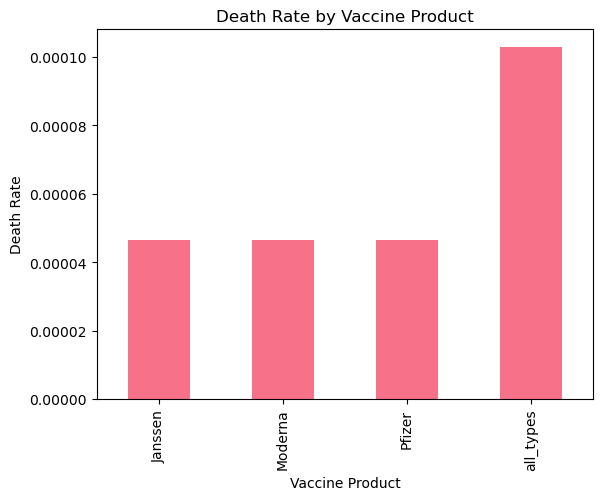

In [100]:
#filter data
death_data = data[data['outcome'] == 'death']
death_data['death_rate'] = death_data['unvaccinated_with_outcome'] / death_data['unvaccinated_population']
grouped_data = death_data.groupby('vaccine_product')['death_rate'].mean()
import matplotlib.pyplot as plt

grouped_data.plot(kind='bar')
plt.xlabel('Vaccine Product')
plt.ylabel('Death Rate')
plt.title('Death Rate by Vaccine Product')
plt.show()



In [101]:
total_deaths_vaccinated = death_data['primary_series_only_with_outcome'].sum() + death_data['boosted_with_outcome'].sum()
total_population_vaccinated = death_data['primary_series_only_population'].sum() + death_data['boosted_population'].sum()
death_rate_vaccinated = total_deaths_vaccinated / total_population_vaccinated

total_deaths_unvaccinated = death_data['unvaccinated_with_outcome'].sum()
total_population_unvaccinated = death_data['unvaccinated_population'].sum()
death_rate_unvaccinated = total_deaths_unvaccinated / total_population_unvaccinated

print("Death rate among vaccinated individuals:", death_rate_vaccinated)
print("Death rate among unvaccinated individuals:", death_rate_unvaccinated)

Death rate among vaccinated individuals: 9.825420555531275e-06
Death rate among unvaccinated individuals: 4.5205376255451646e-05


NB: The results above are in scientif(exponential) form.
Death rate among vaccinated individuals = 0.0000098254 (which is less)
Death rate among unvaccinated individuals = 0.0000452054 (which is higher)

This therefore explains that it is safest to be vaccinated

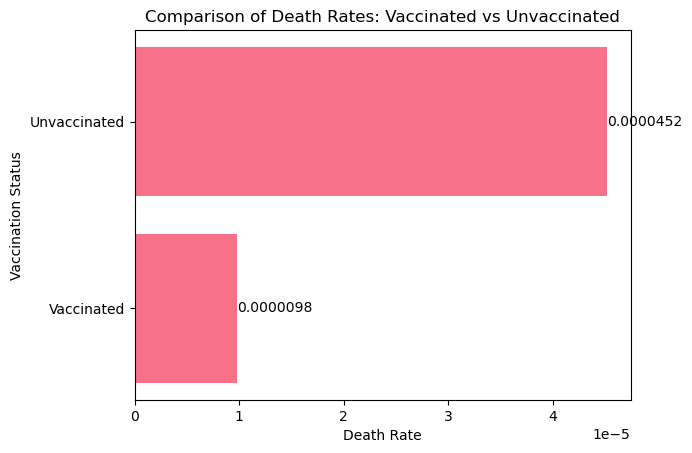

In [102]:
death_rates = [0.0000098254, 0.0000452054]
labels = ['Vaccinated', 'Unvaccinated']

plt.barh(labels, death_rates)
plt.xlabel('Death Rate')
plt.ylabel('Vaccination Status')
plt.title('Comparison of Death Rates: Vaccinated vs Unvaccinated')

# Add values to the bars
for i, rate in enumerate(death_rates):
    plt.text(rate, i, f'{rate:.7f}', ha='left', va='center')

plt.show()

More visualizations

In [103]:
data['death_rate'] = data['unvaccinated_with_outcome'] / data['unvaccinated_population']

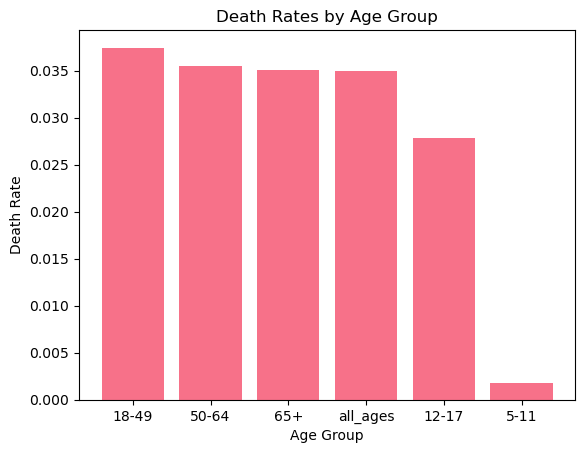

In [104]:
#Age analysis
plt.bar(data['age_group'], data['death_rate'])
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Rates by Age Group')
plt.show()

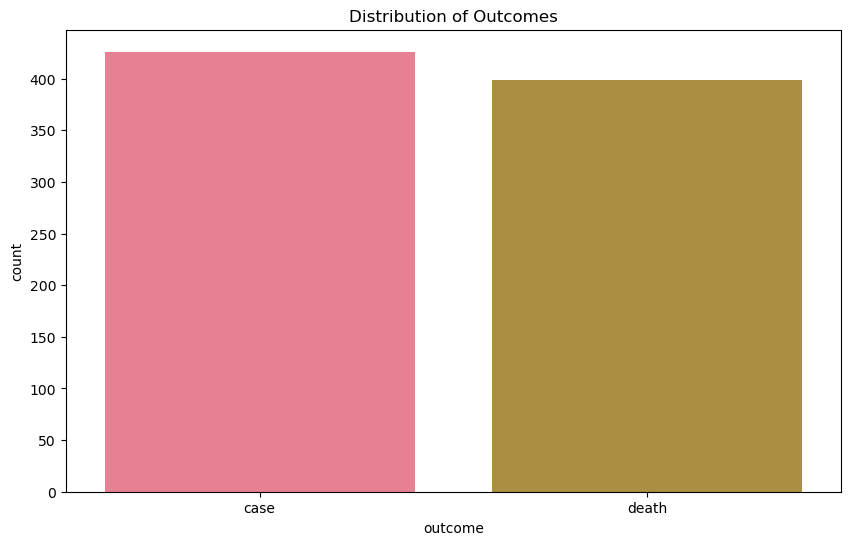

In [105]:
# Outcome distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome', data=data)
plt.title('Distribution of Outcomes')
plt.show()

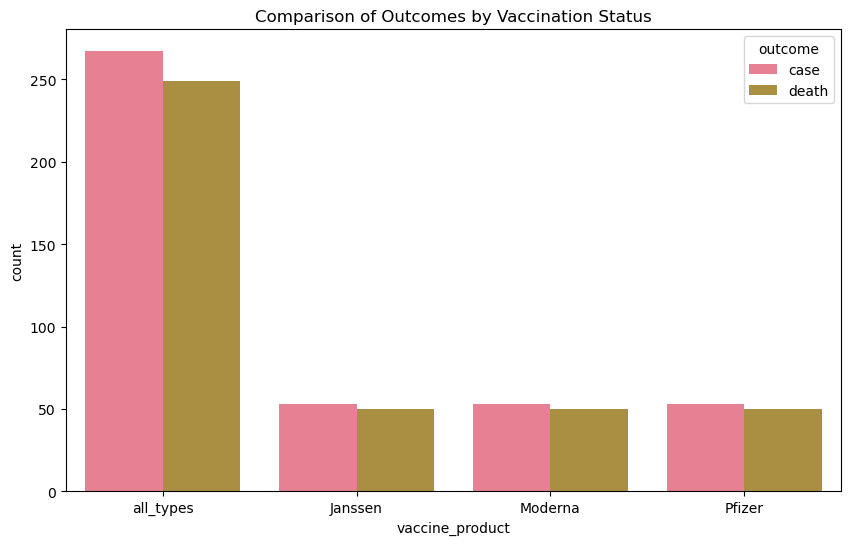

In [106]:
#vaccination status
plt.figure(figsize=(10, 6))
sns.countplot(x='vaccine_product', hue='outcome', data=data)
plt.title('Comparison of Outcomes by Vaccination Status')
plt.show()